In [4]:
import pandas as pd

# Specifica calea către fișierul CSV
data_path = 'data\\all_bikez_curated.csv'

# Citirea setului de date
df = pd.read_csv(data_path)

# Afișează primele câteva rânduri ale setului de date
print("Primele 5 rânduri ale setului de date:")
print(df.head())

# Afișare informații despre dataframe
print(df.info())
print("Dimensiunea setului de date:", df.shape)


Primele 5 rânduri ale setului de date:
     Brand                Model  Year                   Category  Rating  \
0  acabion      da vinci 650-vi  2011  Prototype / concept model     3.2   
1  acabion              gtbo 55  2007                      Sport     2.6   
2  acabion  gtbo 600 daytona-vi  2011  Prototype / concept model     3.5   
3  acabion  gtbo 600 daytona-vi  2021  Prototype / concept model     NaN   
4  acabion              gtbo 70  2007  Prototype / concept model     3.1   

   Displacement (ccm)  Power (hp)  Torque (Nm) Engine cylinder Engine stroke  \
0                 NaN       804.0          NaN        Electric      Electric   
1              1300.0       541.0        420.0    In-line four   four-stroke   
2                 NaN       536.0          NaN        Electric      Electric   
3                 NaN       536.0          NaN        Electric      Electric   
4              1300.0       689.0        490.0    In-line four   four-stroke   

   ... Dry weight (kg) 

C:\Users\Razvan Iacob\AppData\Local\Temp\ipykernel_20184\2472908129.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [5]:
# 3. Curățarea datelor
# Gestionarea valorilor lipsă
print("\nValori lipsă:")
print(df.isnull().sum())

# Tratarea valorilor lipsă sau a altor anomalii

# Eliminarea duplicatelor
print("\nNumărul de date duplicate:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 4. Selecia datelor
# Selectăm coloanele relevante pentru analiză și modelare

# 5. Descrierea datelor
print("\nDescrierea datelor:")
print(df.describe(include='all'))


Valori lipsă:
Brand                      0
Model                     28
Year                       0
Category                   0
Rating                 16684
Displacement (ccm)      1011
Power (hp)             12362
Torque (Nm)            21838
Engine cylinder           11
Engine stroke             11
Gearbox                 5797
Bore (mm)               9783
Stroke (mm)             9783
Fuel capacity (lts)     6768
Fuel system            10628
Fuel control           16464
Cooling system          4214
Transmission type       5611
Dry weight (kg)        15989
Wheelbase (mm)         12979
Seat height (mm)       14290
Front brakes            1583
Rear brakes             1776
Front tire              6490
Rear tire               6464
Front suspension       12365
Rear suspension        12932
Color options          14145
dtype: int64

Numărul de date duplicate: 0

Descrierea datelor:
         Brand         Model          Year Category        Rating  \
count    38472         38444  38472.0000

In [6]:
# Importăm SimpleImputer din sklearn
from sklearn.impute import SimpleImputer

# Definim un imputer pentru valorile numerice (folosind mediana)
numeric_imputer = SimpleImputer(strategy='median')

# Definim un imputer pentru valorile categorice (folosind cea mai frecventă valoare)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Lista coloanelor numerice
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Lista coloanelor categorice
categorical_columns = df.select_dtypes(include=['object']).columns

# Aplicăm imputarea pe coloanele numerice
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Aplicăm imputarea pe coloanele categorice
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Convertirea coloanei "Stroke (mm)" în tipul de date float64
df['Stroke (mm)'] = pd.to_numeric(df['Stroke (mm)'], errors='coerce')

# Verificarea tipului de date al coloanei după conversie
print(df['Stroke (mm)'].dtype)

# Verificăm dacă nu mai există valori lipsă
print("Valori lipsă după imputare:")
print(df.isnull().sum())


float64
Valori lipsă după imputare:
Brand                  0
Model                  0
Year                   0
Category               0
Rating                 0
Displacement (ccm)     0
Power (hp)             0
Torque (Nm)            0
Engine cylinder        0
Engine stroke          0
Gearbox                0
Bore (mm)              0
Stroke (mm)            1
Fuel capacity (lts)    0
Fuel system            0
Fuel control           0
Cooling system         0
Transmission type      0
Dry weight (kg)        0
Wheelbase (mm)         0
Seat height (mm)       0
Front brakes           0
Rear brakes            0
Front tire             0
Rear tire              0
Front suspension       0
Rear suspension        0
Color options          0
dtype: int64


In [7]:
# Numele fișierului pentru salvare
new_data_path = 'all_bikez_curated_imputed.csv'

# Salvarea DataFrame-ului într-un fișier CSV
df.to_csv(new_data_path, index=False)

print("Baza de date imputată a fost salvată în:", new_data_path)


Baza de date imputată a fost salvată în: all_bikez_curated_imputed.csv


In [8]:
import pandas as pd

# Citirea setului de date
df = pd.read_csv('all_bikez_curated_imputed.csv')

# Lista coloanelor pe care vrei să le elimini
coloane_eliminate = ['Engine cylinder', 'Engine stroke', 'Gearbox', 'Fuel system', 'Fuel control', 'Cooling system', 'Transmission type', 'Front brakes', 'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension', 'Rear suspension', 'Color options']

# Eliminarea coloanelor
df = df.drop(columns=coloane_eliminate)

# Afișarea setului de date după eliminarea coloanelor
print(df.head())
# Aplicarea one-hot encoding pe coloana 'Category'
df = pd.get_dummies(df, columns=['Category'], prefix='Category')

# Convertirea valorilor 'True' și 'False' în '1' și '0' în coloanele generate de one-hot encoding
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)

# Afișarea setului de date după aplicarea one-hot encoding
print(df.head())

# Salvarea setului de date modificat într-un fișier CSV
df.to_csv('all_bikez_curated_without_columns.csv', index=False)

print("Setul de date fără coloanele specificate a fost salvat în: all_bikez_curated_without_columns.csv")


     Brand                Model    Year                   Category  Rating  \
0  acabion      da vinci 650-vi  2011.0  Prototype / concept model     3.2   
1  acabion              gtbo 55  2007.0                      Sport     2.6   
2  acabion  gtbo 600 daytona-vi  2011.0  Prototype / concept model     3.5   
3  acabion  gtbo 600 daytona-vi  2021.0  Prototype / concept model     3.4   
4  acabion              gtbo 70  2007.0  Prototype / concept model     3.1   

   Displacement (ccm)  Power (hp)  Torque (Nm)  Bore (mm)  Stroke (mm)  \
0               397.2       804.0         57.0       73.0         57.8   
1              1300.0       541.0        420.0       81.0         63.0   
2               397.2       536.0         57.0       73.0         57.8   
3               397.2       536.0         57.0       73.0         57.8   
4              1300.0       689.0        490.0       81.0         63.0   

   Fuel capacity (lts)  Dry weight (kg)  Wheelbase (mm)  Seat height (mm)  
0         

In [9]:
# Numele fișierului pentru salvare
new_data_path = 'all_bikez_curated_imputed.csv'

# Salvarea DataFrame-ului într-un fișier CSV
df.to_csv(new_data_path, index=False)

print("Baza de date imputată a fost salvată în:", new_data_path)


Baza de date imputată a fost salvată în: all_bikez_curated_imputed.csv


In [1]:
import numpy as np

def entropy(labels):
    total_samples = len(labels)
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / total_samples
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def gini_index(labels):
    total_samples = len(labels)
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / total_samples
    gini = 1 - np.sum(probabilities**2)
    return gini

# Example usage for Entropy, Gini Index, and Information Quantity
labels = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1])  # Class labels
ent = entropy(labels)
gini = gini_index(labels)
print("Entropy:", ent)
print("Gini Index:", gini)


Entropy: 0.9709505944546686
Gini Index: 0.48


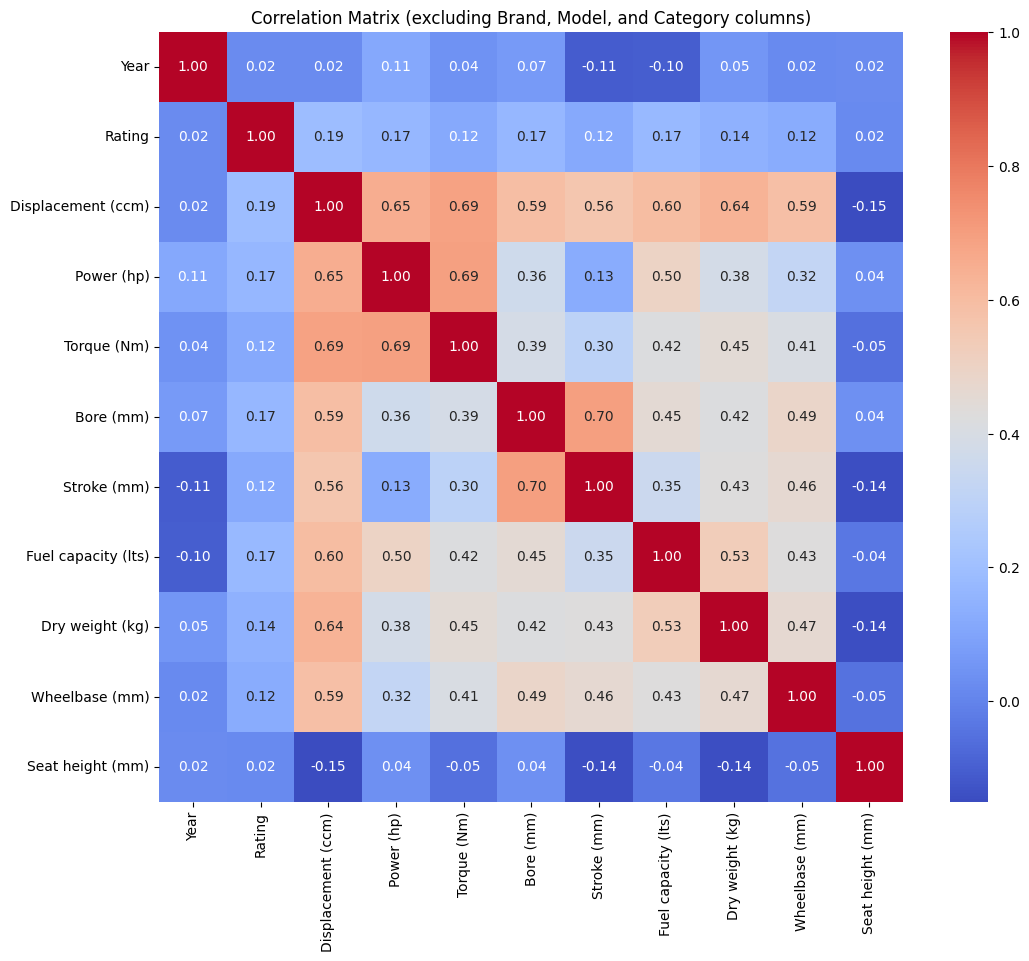

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
df = pd.read_csv('all_bikez_curated_imputed.csv')

# Ensure 'Brand' and 'Model' are columns in the DataFrame
if 'Brand' in df.columns and 'Model' in df.columns:
    # Drop 'Brand' and 'Model' columns
    df = df.drop(['Brand', 'Model'], axis=1)

# Get the list of columns that do not start with 'Category_'
columns_to_include = [col for col in df.columns if not col.startswith('Category_')]

# Calculate the correlation matrix without 'Category_' columns
correlation_matrix = df[columns_to_include].corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (excluding Brand, Model, and Category columns)')
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Citirea datelor
data = pd.read_csv("all_bikez_curated_without_columns.csv")  # înlocuiește "nume_fisier.csv" cu numele fișierului tău CSV

# Eliminarea coloanelor non-numerice
numerical_data = data.drop(columns=["Brand", "Model"])

# Preprocesarea datelor
# înlocuirea valorilor lipsă cu valori medii
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)

# Divizarea datelor în setul de antrenare și cel de testare
train_data, test_data = train_test_split(data_imputed, test_size=0.7, random_state=42)  # ajustează test_size la 0.3 pentru 30%

# Definirea atributelor și a variabilei țintă
X_train = train_data.drop(columns=["Rating"])  # exclude Rating-ul din atribute
y_train = train_data["Rating"]
X_test = test_data.drop(columns=["Rating"])
y_test = test_data["Rating"]

# Definirea algoritmilor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Machine": SVR()
}

# Antrenarea modelelor
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

# Evaluarea modelelor și compararea lor
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Afișarea rezultatelor
for name, mse in results.items():
    print(f"{name}: {mse}")

# Alegerea modelului final
best_model_name = min(results, key=results.get)
best_model = trained_models[best_model_name]
print(f"Best Model: {best_model_name}")

# Poți folosi acum best_model pentru a face predicții pe datele tale de testare


Linear Regression: 0.06707588720749619
Decision Tree: 0.11650009448013235
Support Vector Machine: 0.06616900863947871
Best Model: Support Vector Machine


In [13]:
from sklearn.impute import SimpleImputer

# Imputarea valorilor lipsă
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)

# Folosirea modelului SVM pentru a face predicții pe întregul set de date imputat
y_pred = best_model.predict(numerical_data_imputed.drop(columns=["Rating"]))

# Adăugarea predicțiilor în dataframe-ul original
data["Predicted_Rating"] = y_pred

# Adăugarea predicțiilor în dataframe-ul original
data["Predicted_Rating"] = y_pred

# Analiza rezultatelor și interpretarea lor
# Comparăm Rating-ul real cu cel prezis pentru a vedea cât de bine se potrivește modelul
data[["Rating", "Predicted_Rating"]]

# În funcție de interpretarea contextului domeniului, poți examina diferențele dintre Rating-ul real și cel prezis și să tragi concluzii despre performanța modelului SVM în a prezice Rating-ul motocicletelor.


,Rating,Predicted_Rating
0,3.2,3.482571
1,2.6,3.441385
2,3.5,3.465652
3,3.4,3.466978
4,3.1,3.404941
...,...,...
38467,3.4,3.322121
38468,3.4,3.334261
38469,3.4,3.334486
38470,3.4,3.353560


In [14]:
# Importăm bibliotecile necesare
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Vom folosi un model de regresie aleatoriu pentru exemplu

# Încărcăm setul de date
df = pd.read_csv("all_bikez_curated_without_columns.csv")

# Vizualizăm primele câteva rânduri pentru a ne asigura că setul de date a fost încărcat corect
df.head()


,Brand,Model,Year,Rating,Displacement (ccm),Power (hp),Torque (Nm),Bore (mm),Stroke (mm),Fuel capacity (lts),...,Category_Naked bike,Category_Prototype / concept model,Category_Scooter,Category_Speedway,Category_Sport,Category_Sport touring,Category_Super motard,Category_Touring,Category_Trial,Category_Unspecified category
0,acabion,da vinci 650-vi,2011.0,3.2,397.2,804.0,57.0,73.0,57.8,13.5,...,0,1,0,0,0,0,0,0,0,0
1,acabion,gtbo 55,2007.0,2.6,1300.0,541.0,420.0,81.0,63.0,13.5,...,0,0,0,0,1,0,0,0,0,0
2,acabion,gtbo 600 daytona-vi,2011.0,3.5,397.2,536.0,57.0,73.0,57.8,13.5,...,0,1,0,0,0,0,0,0,0,0
3,acabion,gtbo 600 daytona-vi,2021.0,3.4,397.2,536.0,57.0,73.0,57.8,13.5,...,0,1,0,0,0,0,0,0,0,0
4,acabion,gtbo 70,2007.0,3.1,1300.0,689.0,490.0,81.0,63.0,13.5,...,0,1,0,0,0,0,0,0,0,0


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the dataset while skipping the first two columns
df = pd.read_csv("all_bikez_curated_without_columns.csv", usecols=lambda column: column not in ["Brand", "Model"])

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Rating'])  # Features (all columns except 'Rating')
y = df['Rating']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.1671838040222248
Mean Squared Error (MSE): 0.06488868165219984
Root Mean Squared Error (RMSE): 0.2547325688878433
R-squared (R2) Score: 0.101832825485216


d:\machinelearning\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation (5-fold cross-validation by default)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters:", grid_search.best_params_)

# Get the best model found by grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred_best = best_rf_model.predict(X_test)


In [8]:
# Initialize the Random Forest Regressor model with the best parameters
best_rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150, random_state=42)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the performance of the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print("Best Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_best)
print("Mean Squared Error (MSE):", mse_best)
print("Root Mean Squared Error (RMSE):", rmse_best)
print("R-squared (R2) Score:", r2_best)


NameError: name 'RandomForestRegressor' is not defined

In [7]:
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_best)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_best)

print("Median Absolute Error (MedAE):", medae)
print("Mean Absolute Percentage Error (MAPE):", mape)


NameError: name 'y_test' is not defined

In [6]:
# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)


NameError: name 'best_rf_model' is not defined

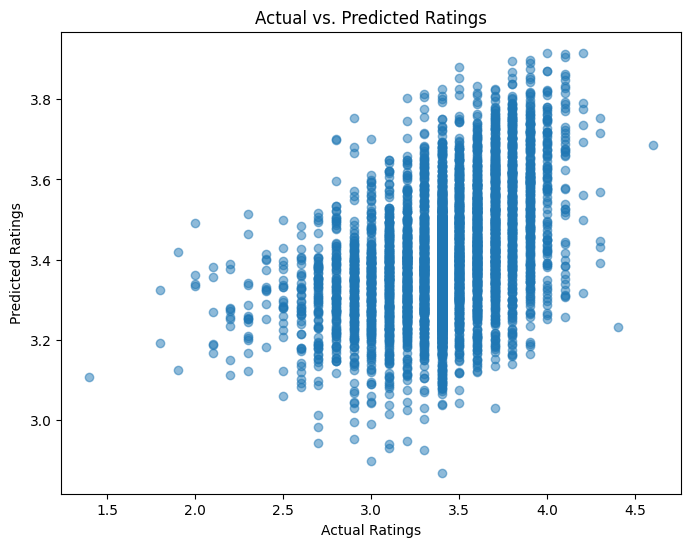

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings")
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_rf_model, "trained_model.pkl")


['trained_model.pkl']